In [ ]:
# Copyright Aditya Rane
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Demonstration of Long Context with Vertex AI Gemini API
> This notebook demonstrates usage of long context with Gemini 1.5 Pro Model

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/Adi8885/portfolio/blob/main/Gemini_Long_Context.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
    <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FAdi8885%2Fportfolio%2Fmain%2FGemini_Long_Context.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/Adi8885/portfolio/blob/main/Gemini_Long_Context.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/Adi8885/portfolio/main/Gemini_Long_Context.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>

## Author(s)
| | |
|-|-|
| Author(s) | [Aditya Rane](https://github.com/Adi8885) |

## Step 1: Installing the Dependencies required

### Step 1.1: Install libraries

In [2]:
#Install Dependancies
! pip install -U google-cloud-aiplatform \
langchain \
langchain-google-vertexai \
datasets \
langchain-chroma \
langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 89.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 7.5 MB/s eta 0:

### Step 1.2 Restart current runtime

To use the newly installed packages in this Jupyter runtime, it is recommended to restart the runtime. Run the following cell to restart the current kernel.

The restart process might take a minute or so.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

After the restart is complete, continue to the next step.

<div class="alert alert-block alert-warning">
<b>⚠️ Wait for the kernel to finish restarting before you continue. ⚠️</b>
</div>


### Step 1.3 Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the cell below to authenticate your environment.

This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).

In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Step 1.4 Set Variables for this notebook

In [3]:
# TODO(developer): Update the below lines
PROJECT_ID = "vertexai-pgt" #@param {type:"string"}
LOCATION = "us-central1" #@param {type:"string"}
BUCKET_NAME = 'gemini-long-context' #@param {type:"string"}
REGION = 'us' #@param {type:"string"}


### Step 1.5 Import Libraries

In [4]:
import glob
import os

import itertools
import vertexai

from google.cloud import storage

from langchain_core.messages import HumanMessage

# LangChain package for Vertex AI
from langchain_google_vertexai import (  # type: ignore[import-untyped]
    ChatVertexAI,
    VertexAIEmbeddings,
    HarmBlockThreshold,
    HarmCategory,
)

## Step 2 : Download [financial-qa-dataset](https://github.com/Adi8885/financial-qa-dataset) dataset and Save to GCS Bucket

### Step 2.1 Download the from github

In [5]:
!git clone https://github.com/Adi8885/financial-qa-dataset.git

Cloning into 'financial-qa-dataset'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 78 (delta 12), reused 13 (delta 3), pack-reused 0
Receiving objects: 100% (78/78), 53.85 MiB | 20.79 MiB/s, done.
Resolving deltas: 100% (12/12), done.


### Step 2.2 Save to GCS Bucket

In [6]:
#Initialise the client
client = storage.Client()

In [ ]:
#Create a new GCS bucket
bucket = client.bucket(BUCKET_NAME
                       , user_project=PROJECT_ID
                       )


new_bucket = client.create_bucket(bucket_or_name = bucket
                                  , location=REGION
                                  , project=PROJECT_ID
                                  )

In [ ]:
#Upload a single file to this bucket
blob = bucket.blob('goog-10-k-2023-report.pdf')
blob.upload_from_filename('/content/financial-qa-dataset/data/Reports/goog-10-k-2023.pdf')

## Step 3 : Using Long Context of Gemini 1.5 Pro

### Step 3.1 Use Vertex AI models

The [Gemini-1.5-pro](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/overview) models are designed to handle natural language tasks, multiturn text and code chat, and code generation.

In [8]:
# Initialise safety filters for vertex model
safety_settings = {
    HarmCategory.HARM_CATEGORY_UNSPECIFIED: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
}

generation_config = {"temperature": 0.0, "topk": 1}

# Initialise the ChatVertexAI model
chat_model_gemini = ChatVertexAI(
    model_name="gemini-1.5-pro-001",
    safety_settings=safety_settings,
    generation_config=generation_config,
    project=PROJECT_ID,
    location=LOCATION,
)

### Step 3.2 Pass Long Document to Gemini

In [9]:
# Prepare input for model consumption
pdf_message = {
    "type": "image_url",
    "image_url": {"url": "gs://gemini-long-context/goog-10-k-2023-report.pdf"},
}

text_message = {
    "type": "text",
    "text": """The attached document contains entire Sec 10K filing for Alphabet.
    Your task is to answer question based on the attached document.
    What was Alphabet's revenue for 2023 ?""",
}

message = HumanMessage(content=[pdf_message ,text_message])

In [18]:
# invoke a model response
model_response = chat_model_gemini.invoke([message])

In [20]:
#Check response and print usage metadata
print(model_response.content)
print(f"token usage : {model_response.dict()['usage_metadata']}")

Alphabet's revenue for 2023 was $307.394 billion. 

token usage : {'input_tokens': 25069, 'output_tokens': 23, 'total_tokens': 25092}


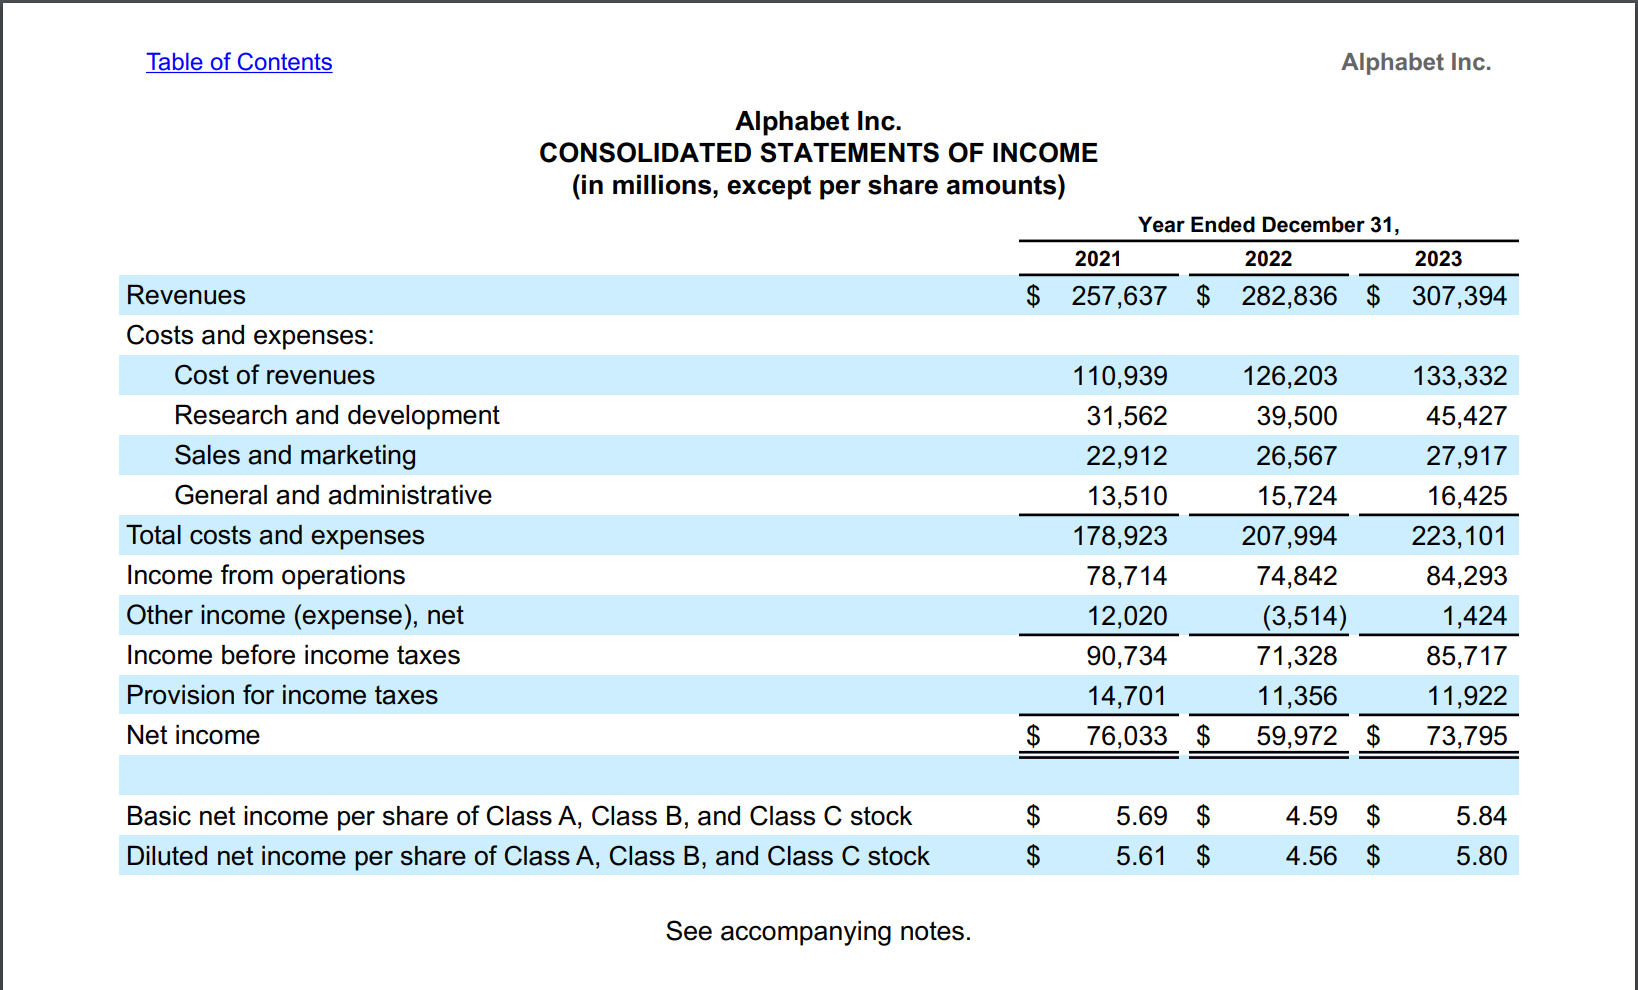